# Setting up the environment

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
input_file_train = r'./input/train.csv'
input_file_test = r'./input/test.csv'
output_file = r'./output/submission.csv'

Reading input files

In [3]:
df_train = pd.read_csv(input_file_train)
df_test = pd.read_csv(input_file_test)

df_train.set_index('id', drop=True, inplace=True)
df_test.set_index('id', drop=True, inplace=True)

In [4]:
df_train_x = df_train.drop(['target'], axis=1)
df_train_y = pd.get_dummies(df_train.target)

df_test_x = df_test

df_all = pd.concat([df_train_x, df_test_x])
df_all.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.25676,0.435640,0.114993,0.588513,0.604060,0.161047,0.736327,1.231960,0.897713,0.940720,...,0.714567,0.587093,0.530293,0.615613,0.134660,0.359300,0.520233,0.389433,0.976433,0.559953
std,0.92293,1.986794,0.521330,1.834452,2.796924,0.602688,2.346481,2.704552,3.398307,1.907233,...,1.730979,2.021647,2.316540,2.352531,0.626213,1.476461,2.178292,1.475268,2.596960,1.687348
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10.00000,31.000000,6.000000,26.000000,38.000000,10.000000,27.000000,31.000000,39.000000,17.000000,...,23.000000,32.000000,37.000000,33.000000,9.000000,29.000000,29.000000,26.000000,46.000000,21.000000


Creating global variables

In [5]:
n_train = df_train_x.shape[0]
n_test = df_test_x.shape[0]

# Preliminary Analysis

In [6]:
# Check for missing values
df_all.count()

# Result: No missing values

feature_0     150000
feature_1     150000
feature_2     150000
feature_3     150000
feature_4     150000
feature_5     150000
feature_6     150000
feature_7     150000
feature_8     150000
feature_9     150000
feature_10    150000
feature_11    150000
feature_12    150000
feature_13    150000
feature_14    150000
feature_15    150000
feature_16    150000
feature_17    150000
feature_18    150000
feature_19    150000
feature_20    150000
feature_21    150000
feature_22    150000
feature_23    150000
feature_24    150000
feature_25    150000
feature_26    150000
feature_27    150000
feature_28    150000
feature_29    150000
feature_30    150000
feature_31    150000
feature_32    150000
feature_33    150000
feature_34    150000
feature_35    150000
feature_36    150000
feature_37    150000
feature_38    150000
feature_39    150000
feature_40    150000
feature_41    150000
feature_42    150000
feature_43    150000
feature_44    150000
feature_45    150000
feature_46    150000
feature_47   

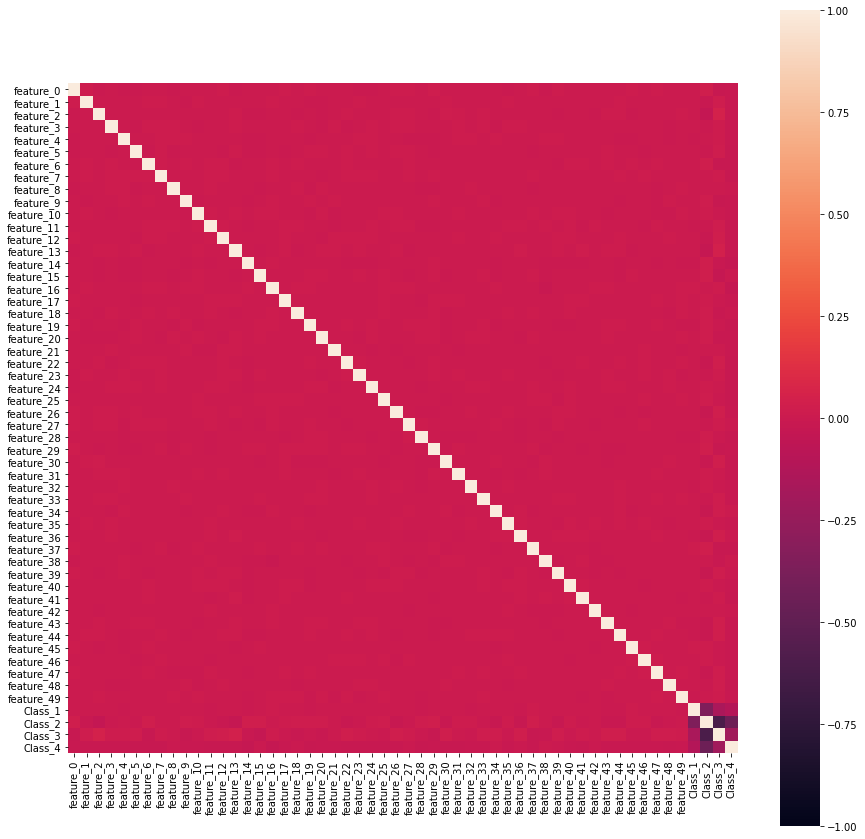

In [7]:
plt.figure(figsize=(15, 15))
sns.heatmap(pd.concat([df_train_x, df_train_y], axis=1).corr(), square=True, vmin=-1, vmax=1)
plt.show()

# They are all mostly uncorrelated

# Rearranging Data

In [8]:
df_all = df_all / (df_all.max(axis=0) - df_all.min(axis=0))
df_all.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.025676,0.014053,0.019166,0.022635,0.015896,0.016105,0.027271,0.039741,0.023018,0.055336,...,0.031068,0.018347,0.013597,0.018655,0.014962,0.012390,0.017939,0.014978,0.021227,0.026664
std,0.092293,0.064090,0.086888,0.070556,0.073603,0.060269,0.086907,0.087244,0.087136,0.112190,...,0.075260,0.063176,0.059398,0.071289,0.069579,0.050912,0.075114,0.056741,0.056456,0.080350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.058824,...,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.948718,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Learning

In [9]:
train_x, dev_x, train_y, dev_y = train_test_split(df_train_x, df_train_y, test_size=0.1)

In [85]:
def get_model (alpha=0.001, lambd=0):
    regularizer = keras.regularizers.l2(lambd)
    optimizer = keras.optimizers.Adam(learning_rate=alpha)

    model = keras.Sequential(layers=[
        keras.layers.Dense(50, name='input_layer'),
        keras.layers.Dense(50, activation='relu', name='hidden_layer_1', kernel_regularizer=regularizer),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50, activation='relu', name='hidden_layer_2', kernel_regularizer=regularizer),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50, activation='relu', name='hidden_layer_3', kernel_regularizer=regularizer),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(50, activation='relu', name='hidden_layer_4', kernel_regularizer=regularizer),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(4, activation=keras.activations.softmax, name='output_layer', kernel_regularizer=regularizer),
    ], name='model')
    model.compile(optimizer=optimizer, loss='categorical_crossentropy')
    
    return model

def plot_history (history, title='Loss vs. # of iterations', ylim=None, xlim=None):
	plt.plot(history.history['loss'], label='Train')
	plt.plot(history.history['val_loss'], label='Dev')
	plt.xlabel('# of iterations')
	plt.ylabel('Loss')
	if ylim is not None:
		plt.ylim(ylim)
	if xlim is not None:
		plt.xlim(xlim)
	plt.legend()
	plt.title(title)
	plt.grid()
	plt.show()

In [69]:
class ModelCallback (keras.callbacks.Callback):
	def on_epoch_end (self, epoch, logs=None):
		if epoch % 50 == 0:
			print(f'Epoch {epoch} - {" - ".join(f"{key}: {round(value, 4)}" for key, value in logs.items())}')

Epoch 0 - loss: 1.8617 - val_loss: 2.0605
Epoch 50 - loss: 1.2003 - val_loss: 1.1747
Train:	 1.116994023323059
Dev:	 1.1202973127365112


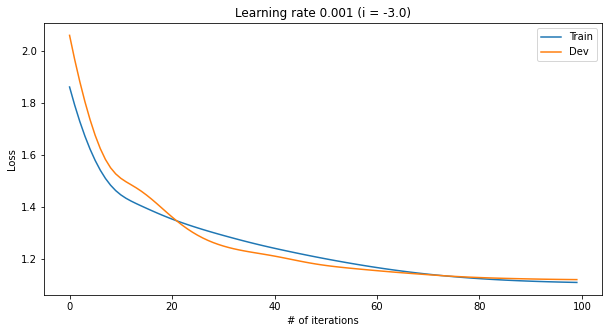


Epoch 0 - loss: 1.8139 - val_loss: 2.542
Epoch 50 - loss: 1.121 - val_loss: 1.1348
Train:	 1.1127333641052246
Dev:	 1.1180062294006348


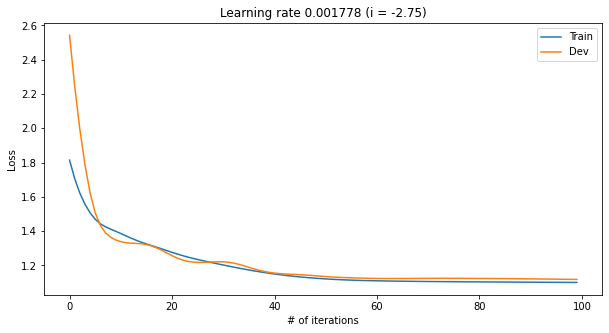


Epoch 0 - loss: 1.8469 - val_loss: 1.7352
Epoch 50 - loss: 1.1047 - val_loss: 1.1516
Train:	 1.1044453382492065
Dev:	 1.117051124572754


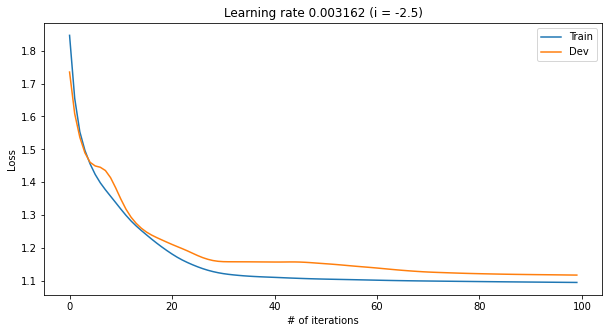


Epoch 0 - loss: 1.9152 - val_loss: 1.6153
Epoch 50 - loss: 1.1011 - val_loss: 1.1191
Train:	 1.1009564399719238
Dev:	 1.1072890758514404


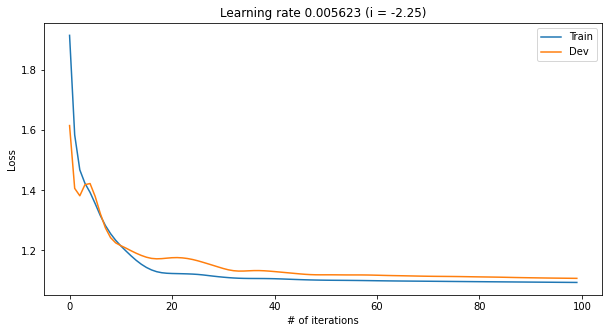


Epoch 0 - loss: 1.8601 - val_loss: 1.4031
Epoch 50 - loss: 1.1004 - val_loss: 1.1394
Train:	 1.1011468172073364
Dev:	 1.110241413116455


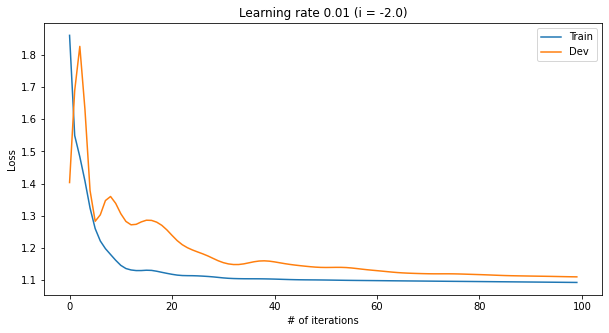

In [50]:
# Tuning for learning rate

for i in np.linspace(-3, -2, 5, endpoint=True):
	learning_rate = 10 ** i
	model = get_model(learning_rate)

	history = model.fit(
		train_x,train_y,
		epochs=100,
		verbose=0,
		batch_size=train_x.shape[0],
		validation_data=(dev_x, dev_y),
		callbacks=[ModelCallback()],
	)

	print('Train:\t', model.evaluate(train_x, train_y, verbose=0))
	print('Dev:\t', model.evaluate(dev_x, dev_y, verbose=0))
	plot_history(history, title=f'Learning rate {round(learning_rate, 6)} (i = {round(i, 3)})')
	print()

In [ ]:
learning_rate = round(10 ** -3, 6)
model = get_model(alpha=learning_rate, lambd=0.02)

history = model.fit(
	train_x,train_y,
	epochs=200,
	verbose=0,
	batch_size=train_x.shape[0],
	validation_data=(dev_x, dev_y),
	callbacks=[ModelCallback()],
)

print('Train:\t', model.evaluate(train_x, train_y, verbose=0))
print('Dev:\t', model.evaluate(dev_x, dev_y, verbose=0))
plot_history(history, title=f'Learning rate {round(learning_rate, 6)}', ylim=[1, 1.2])
print()

Epoch 0 - loss: 6.1705 - val_loss: 5.7468
Epoch 50 - loss: 3.7383 - val_loss: 3.6892
Epoch 100 - loss: 2.4643 - val_loss: 2.4519


In [ ]:
plot_history(history, title=f'Learning rate {round(learning_rate, 6)}', ylim=[1, 1.2], xlim=[150, 200])

In [67]:
predicted_values = pd.DataFrame(model.predict(df_test_x), columns=df_train_y.columns)
predicted_values.set_index(df_test_x.axes[0], drop=True, inplace=True)
predicted_values.to_csv(output_file)